<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Dela_Farahita_Zain_Modul_5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

# **1. Buat Gamma Correction**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


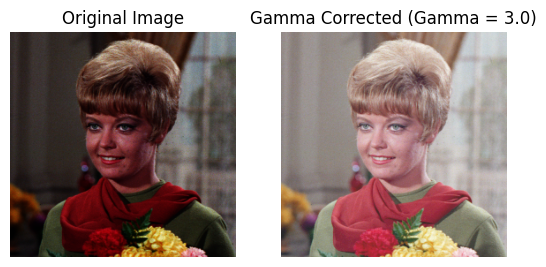

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk menerapkan gamma correction
def gamma_correction(image, gamma):
    # Normalisasi nilai piksel citra (dari 0-255 ke 0-1)
    normalized_img = image / 255.0

    # Terapkan rumus gamma correction dengan pembalikan logika
    if gamma > 1:
        corrected_img = 255 * (normalized_img ** (1 / gamma))  # Mencerahkan gambar
    else:
        corrected_img = 255 * (normalized_img ** gamma)  # Menggelapkan gambar

    # Pastikan nilai berada dalam rentang 0-255 dan ubah menjadi tipe uint8
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)

    return corrected_img

# Program utama
print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
    # Input nilai gamma
    gamma_value = float(input('Masukkan nilai Gamma: '))

    # Baca citra asli
    original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul5/female.tiff')

    # Terapkan gamma correction pada citra
    corrected_image = gamma_correction(original, gamma_value)

    # Tampilkan citra asli dan citra yang sudah dikoreksi gamma
    original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
    corrected_image_rgb = cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB)

    # Tampilkan hasil
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(corrected_image_rgb)
    plt.title(f'Gamma Corrected (Gamma = {gamma_value})')
    plt.axis('off')

    plt.show()

except ValueError:
    print('Error, not a number')


# **2. Buat Simulasi Image Depth**

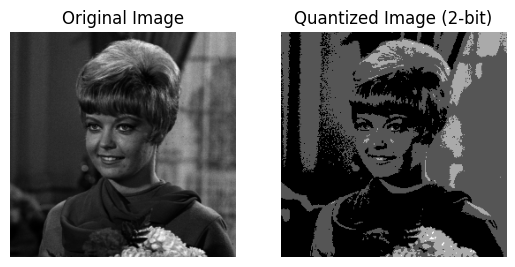

In [4]:
# Nilai kedalaman bit yang ingin dicoba
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Baca citra masukan dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul5/female.tiff', cv.IMREAD_GRAYSCALE)

# Jika gambar tidak ditemukan
if original is None:
    print("Error: Gambar tidak ditemukan atau tidak bisa dibuka.")
else:
    # Buat citra baru untuk menyimpan hasil dengan kedalaman citra yang diinginkan
    depth_image = np.zeros(original.shape, original.dtype)

    # Terapkan kuantisasi berdasarkan kedalaman bit yang diberikan
    depth_image = np.round(original / level) * level

    # Pastikan nilai berada dalam rentang 0-255
    depth_image = np.clip(depth_image, 0, 255).astype(np.uint8)

    # Tampilkan citra asli dan citra hasil kuantisasi
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(depth_image, cmap='gray')
    plt.title(f'Quantized Image ({bit_depth}-bit)')
    plt.axis('off')

    plt.show()


# **3. Buat modul Average Denoising**

In [ ]:
# Membaca citra dengan Gaussian Noise dari folder yang disediakan
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_Ganjil_2024/Modul5/noises/*.jpg'):
    n = cv.imread(img)
    if n is not None:
        cv_img.append(n)

# Pastikan citra berhasil dibaca
if len(cv_img) == 0:
    print("Error: Tidak ada citra yang ditemukan di folder noise.")
else:
    # Inisialisasi citra untuk menyimpan hasil rata-rata
    average_image = np.zeros_like(cv_img[0], dtype=np.float64)

    # Lakukan perulangan untuk menjumlahkan semua citra
    for img in cv_img:
        average_image += img.astype(np.float64)

    # Membagi hasil penjumlahan dengan jumlah citra untuk mendapatkan rata-rata
    average_image /= len(cv_img)

    # Ubah hasil kembali menjadi tipe uint8
    average_image = np.clip
